In [39]:
import numpy as np
from mewralNet import MewralNet
from backpropagation import Backpropagation
import matplotlib.pyplot as plt

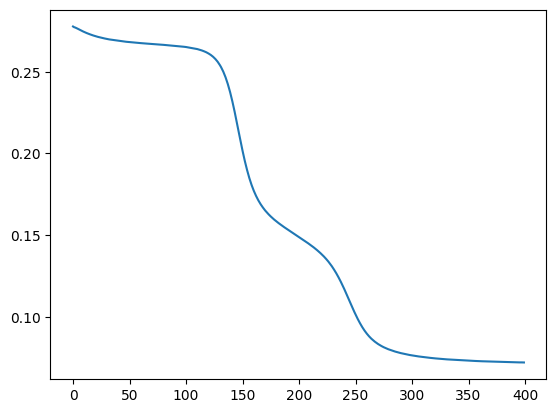

400


In [56]:
import numpy as np

input_data = np.array([
    [1, 0],
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0],
    [0, 1],
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1]
])
output_data = np.array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1])


layer_dims = [input_data.shape[1],4 , 3, len(np.unique(output_data))]

back = Backpropagation(layer_dims=layer_dims, learning_rate=0.5)

back.backpropagate(input_data, output_data, epocs=400)

index  = range(len(back.loss_per_epoch))
plt.plot(index, back.loss_per_epoch)
plt.show()
print(len(back.loss_per_epoch))


In [57]:
print(back.predict([1,1]))
print(back.predict([1,0]))


[0.047  0.9573]
[0.9688 0.0313]


# RNN Implementation Test

In [10]:
from RNN import RecurrentMewralNet
from sigmoid_basedRNN import RecurrentMewralNet as SRNN
import numpy as np
import matplotlib.pyplot as plt

# --- Your Existing Setup ---
print("Generating Data...")
steps = np.linspace(0, 10, 50)
data = np.sin(steps)

# Shape data into (Sequence_Length, Input_Size)
inputs = data[:-1].reshape(-1, 1) 
targets = data[1:].reshape(-1, 1) 

print(f"Input Shape: {inputs.shape}")
print(f"Target Shape: {targets.shape}")



Generating Data...
Input Shape: (49, 1)
Target Shape: (49, 1)



Starting Training...
Epoch 0: Loss = 32.070802
Epoch 200: Loss = 0.023593
Epoch 400: Loss = 0.016768
Epoch 600: Loss = 0.013568
Epoch 800: Loss = 0.011233
Epoch 1000: Loss = 0.009323
Epoch 1200: Loss = 0.007717
Epoch 1400: Loss = 0.006360
Epoch 1600: Loss = 0.005222
Epoch 1800: Loss = 0.004278

Training Complete! Generating Graphs...


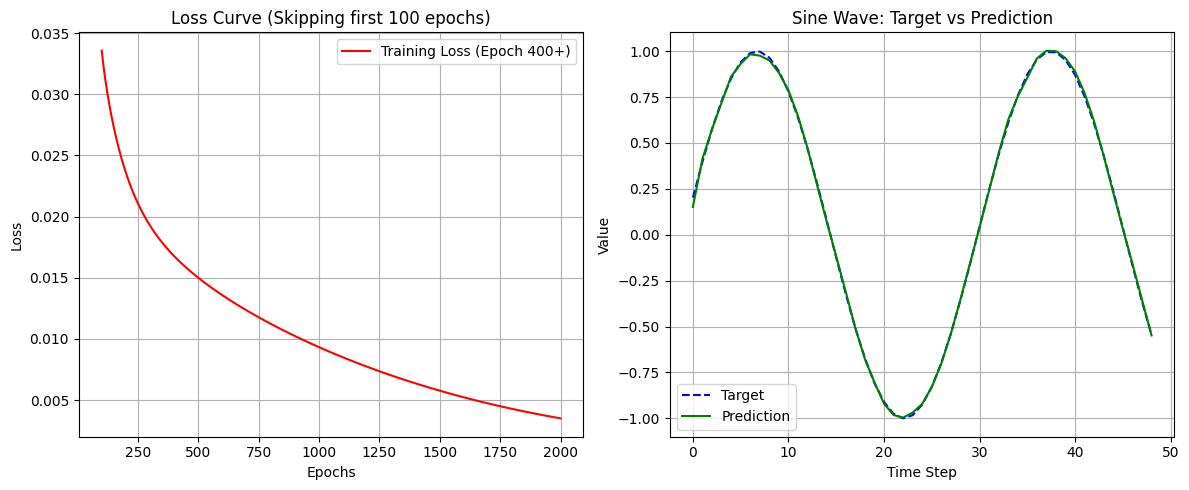

In [11]:
rnn = RecurrentMewralNet(input_size=1, hidden_size=20, output_size=1, initialzation="xavier")
print("\nStarting Training...")
epochs = 2000
loss_history = [] 

for i in range(epochs):
    loss = rnn.BPTT(inputs, targets, learning_rate=0.005)
    loss_history.append(loss)
    
    if i % 200 == 0:
        print(f"Epoch {i}: Loss = {loss:.6f}")

print("\nTraining Complete! Generating Graphs...")
predictions, _ = rnn.forward(inputs)

plt.figure(figsize=(12, 5))

# Plot 1: Loss over Time (CLIPPED)
plt.subplot(1, 2, 1)

start_epoch = 100
clipped_loss = loss_history[start_epoch:]

epoch_range = range(start_epoch, epochs)

plt.plot(epoch_range, clipped_loss, label='Training Loss (Epoch 400+)', color='red')
plt.title(f'Loss Curve (Skipping first {start_epoch} epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot 2: Actual vs Predicted (Same as before)
plt.subplot(1, 2, 2)
plt.plot(targets.flatten(), label='Target', color='blue', linestyle='dashed')
plt.plot(np.array(predictions).flatten(), label='Prediction', color='green')
plt.title('Sine Wave: Target vs Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Sin Wave Blindfold Test


--- Starting Blindfold Generation ---


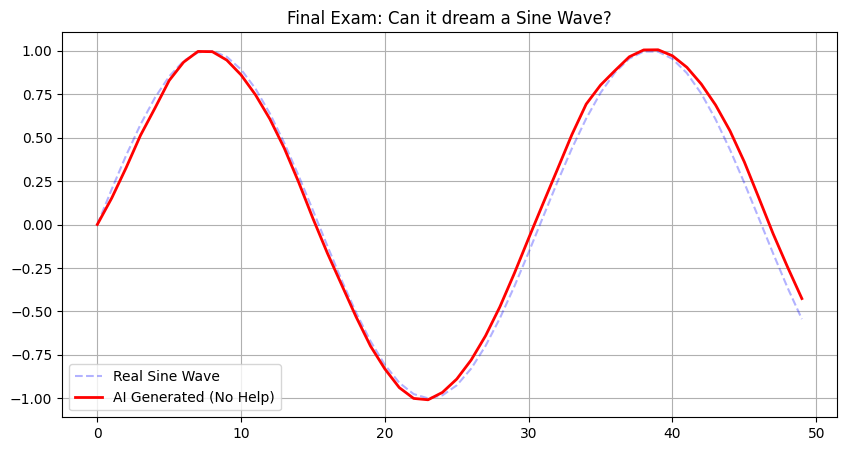

In [12]:
# This test was generated by Gemini(AI)!
import matplotlib.pyplot as plt

# --- BLINDFOLD TEST (The Final Exam) ---
print("\n--- Starting Blindfold Generation ---")

# 1. Start with the very first point (Index 0)
current_input = inputs[0].reshape(1, 1)
generated_sequence = [current_input.item()] 

# 2. Reset Memory
# We pass None so the forward method creates a fresh zero-state
last_hidden_state = None 

# 3. Generate 50 steps purely from its own imagination
for _ in range(49):
    prediction, hidden_dict = rnn.forward(current_input, hidden_state=last_hidden_state)
    
    # Extract result
    next_value = prediction[-1].item()
    generated_sequence.append(next_value)
    
    # Update memory for next step
    # Since we fed 1 input, the new state is at index 0
    last_hidden_state = hidden_dict[0] 
    
    # Update input
    current_input = np.array([[next_value]])

# 4. Plot
plt.figure(figsize=(10, 5))
plt.plot(data, label='Real Sine Wave', color='blue', linestyle='dashed', alpha=0.3)
plt.plot(generated_sequence, label='AI Generated (No Help)', color='red', linewidth=2)
plt.title('Final Exam: Can it dream a Sine Wave?')
plt.legend()
plt.grid(True)
plt.show()

### Dual Wave Test

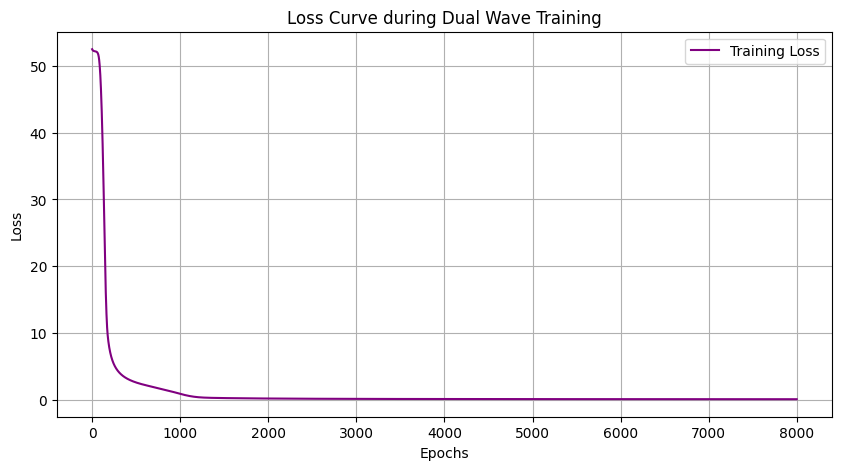

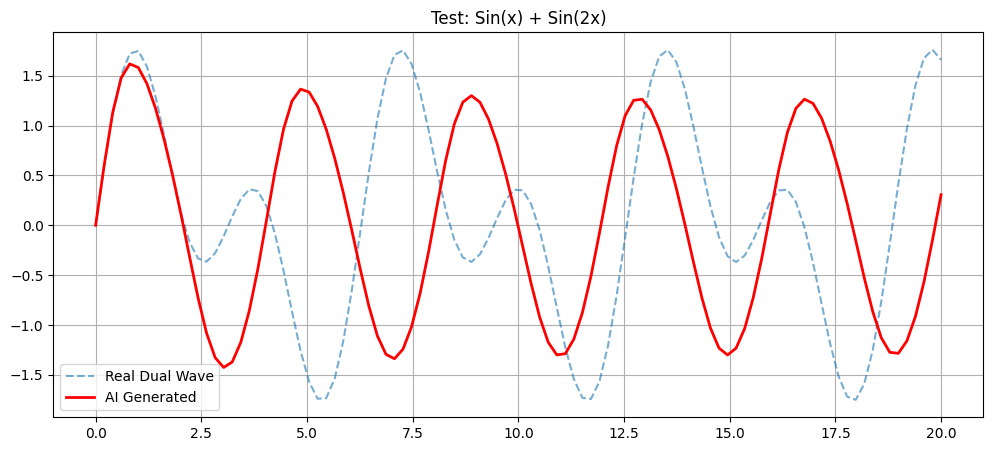

In [13]:
# --- 1. Generate The "Dual Wave" Data ---
steps = np.linspace(0, 20, 100) 
data = np.sin(steps) + np.sin(2 * steps) 

inputs = data[:-1].reshape(-1, 1)
targets = data[1:].reshape(-1, 1)

# --- 2. Initialize & Train ---
rnn = RecurrentMewralNet(input_size=1, hidden_size=10, output_size=1, initialzation="random")

loss_history = [] # To store loss values

for i in range(8000):
    loss = rnn.BPTT(inputs, targets, learning_rate=0.0005) 
    loss_history.append(loss)

# --- 3. Plot Loss ---
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='purple')
plt.title('Loss Curve during Dual Wave Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show('loss_plot.png')

# --- 4. The Blindfold Test (User's request context) ---
curr_input = inputs[0].reshape(1, 1)
last_h = None
gen_seq = [curr_input.item()]

for _ in range(99):
    pred_list, h_dict = rnn.forward(curr_input, hidden_state=last_h)
    last_h = h_dict[0]
    next_val = pred_list[-1].item()
    gen_seq.append(next_val)
    curr_input = np.array([[next_val]])

plt.figure(figsize=(12, 5))
plt.plot(steps, data, label='Real Dual Wave', linestyle='--', alpha=0.6)
plt.plot(steps, gen_seq, label='AI Generated', color='red', linewidth=2)
plt.title('Test: Sin(x) + Sin(2x)')
plt.legend()
plt.grid(True)
plt.show('prediction_plot.png')

Epoch 0: Loss = 81.602151
Epoch 200: Loss = 0.301180
Epoch 400: Loss = 0.199887
Epoch 600: Loss = 0.142942
Epoch 800: Loss = 0.102168
Epoch 1000: Loss = 0.076267
Epoch 1200: Loss = 0.059039
Epoch 1400: Loss = 0.046390
Epoch 1600: Loss = 0.036759
Epoch 1800: Loss = 0.029340
Epoch 2000: Loss = 0.023581
Epoch 2200: Loss = 0.019084
Epoch 2400: Loss = 0.015557
Epoch 2600: Loss = 0.012784
Epoch 2800: Loss = 0.010600
Epoch 3000: Loss = 0.008879
Epoch 3200: Loss = 0.007522
Epoch 3400: Loss = 0.006452
Epoch 3600: Loss = 0.005607
Epoch 3800: Loss = 0.004938
Epoch 4000: Loss = 0.004406
Epoch 4200: Loss = 0.003981
Epoch 4400: Loss = 0.003639
Epoch 4600: Loss = 0.003361
Epoch 4800: Loss = 0.003132


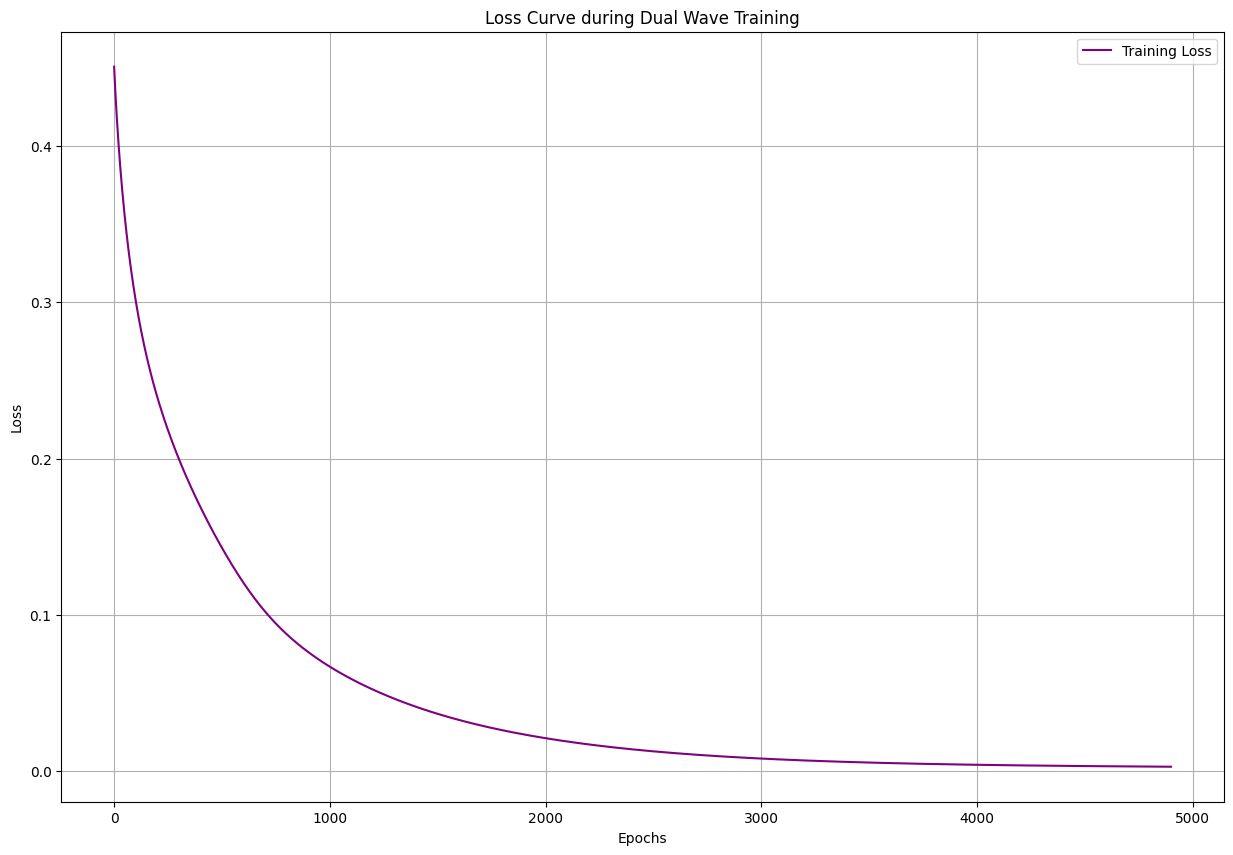

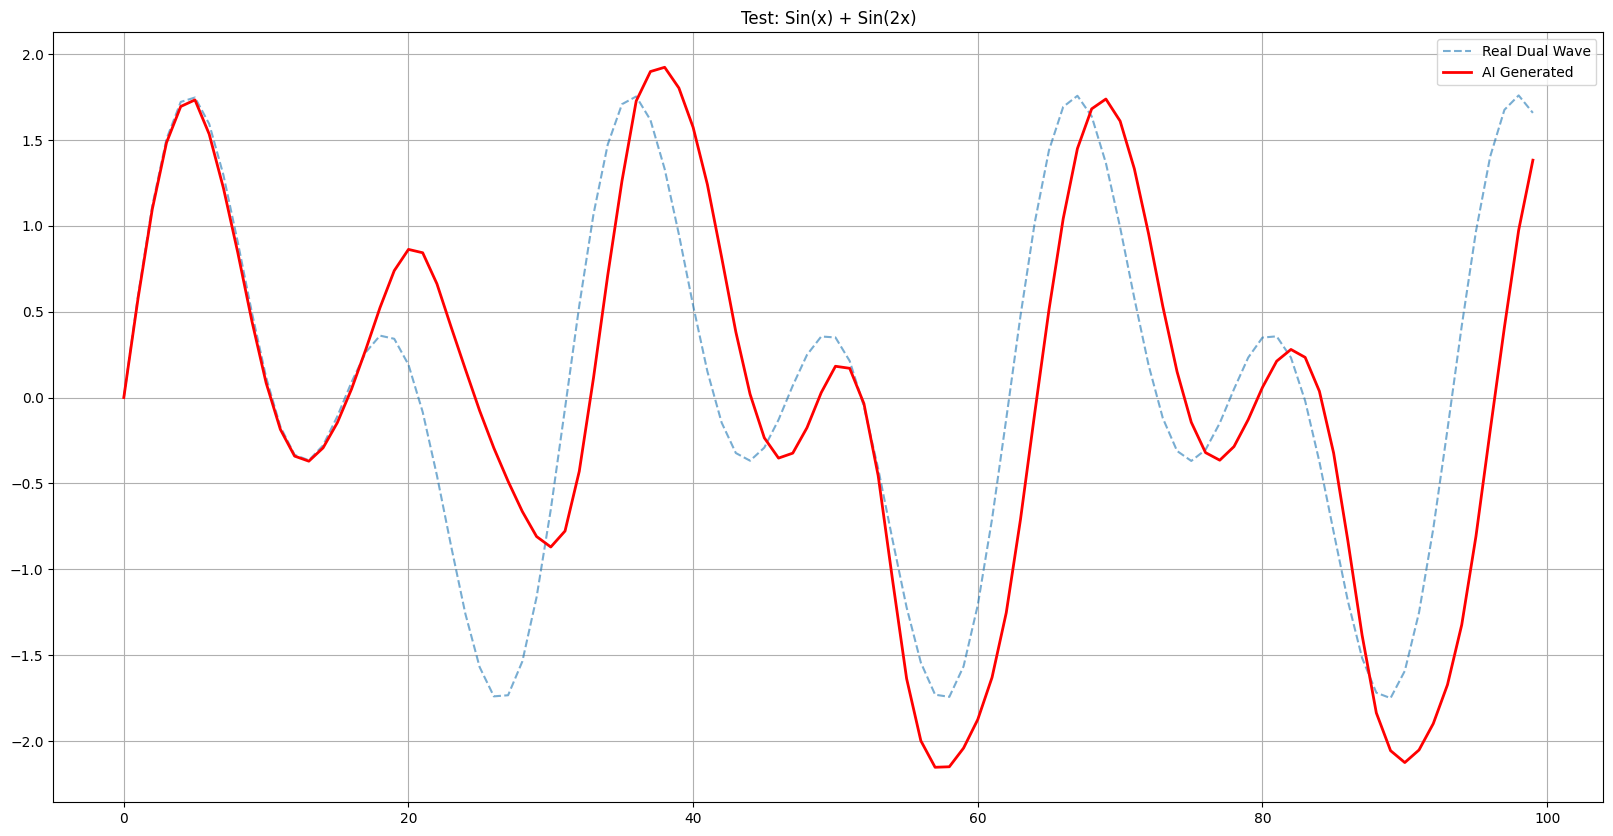

In [36]:
# --- 1. Generate The "Dual Wave" Data ---
steps = np.linspace(0, 20, 100) 

data = np.sin(steps) + np.sin(2 * steps) 
# data = generate_signal()

inputs = data[:-1].reshape(-1, 1)
targets = data[1:].reshape(-1, 1)

# --- 2. Initialize & Train ---
rnn = RecurrentMewralNet(input_size=1, hidden_size=20, output_size=1, initialzation="xavier")

loss_history = [] # To store loss values

for i in range(5000):
    loss = rnn.BPTT(inputs, targets, learning_rate=0.001) 
    loss_history.append(loss)

    if i % 200 == 0:
        print(f"Epoch {i}: Loss = {loss:.6f}")

# --- 3. Plot Loss ---
plt.figure(figsize=(15, 10))
plt.plot(loss_history[100:], label='Training Loss', color='purple')
plt.title('Loss Curve during Dual Wave Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show('loss_plot.png')

# --- 4. The Blindfold Test (User's request context) ---
curr_input = inputs[0].reshape(1, 1)
last_h = None
gen_seq = [curr_input.item()]

for _ in range(99):
    pred_list, h_dict = rnn.forward(curr_input, hidden_state=last_h)
    last_h = h_dict[0]
    next_val = pred_list[-1].item()
    gen_seq.append(next_val)
    curr_input = np.array([[next_val]])

plt.figure(figsize=(20, 10))
plt.plot(data, label='Real Dual Wave', linestyle='--', alpha=0.6)
plt.plot(gen_seq, label='AI Generated', color='red', linewidth=2)
plt.title('Test: Sin(x) + Sin(2x)')
plt.legend()
plt.grid(True)
plt.show('prediction_plot.png')

Generating Chaotic Signal...
Training on 500 steps of Chaos...
Epoch 0: Loss = 106.12607
Epoch 1000: Loss = 45.34939
Epoch 2000: Loss = 25.05502
Epoch 3000: Loss = 8.95739
Epoch 4000: Loss = 6.23426
Epoch 5000: Loss = 3.90941
Epoch 6000: Loss = 3.53307

Running Chaotic Blindfold Test...


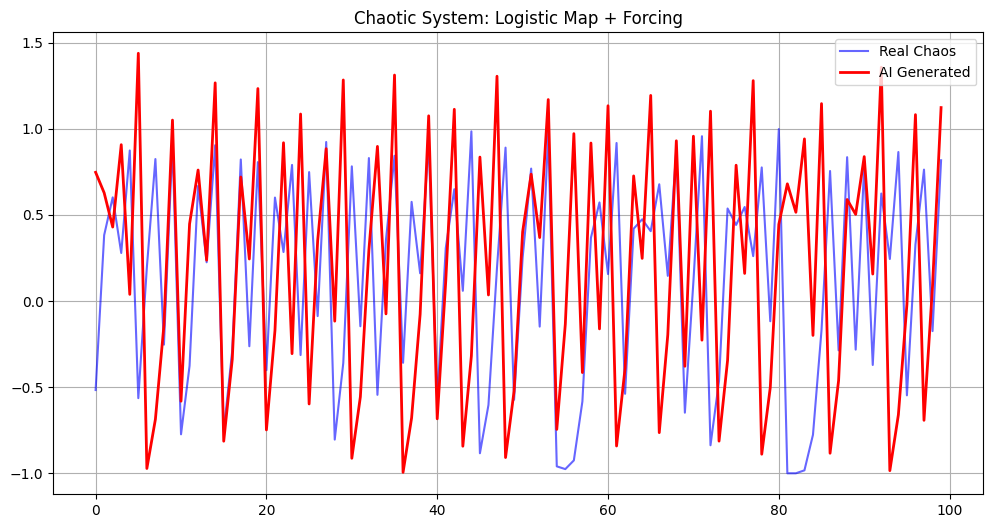

In [38]:
# --- 3. Prepare Chaos Data ---
print("Generating Chaotic Signal...")
T_train = 500
T_test = 200

# Generate a long sequence
full_signal = generate_signal(T=T_train + T_test, x0=0.2)

# Normalize data to range [-1, 1] for Tanh preference (optional but helps)
# The signal is naturally [0, 1], so we center it.
full_signal = (full_signal - 0.5) * 2

# Split into inputs and targets (Next-Token Prediction)
inputs = full_signal[:-1].reshape(-1, 1)
targets = full_signal[1:].reshape(-1, 1)

train_inputs = inputs[:T_train]
train_targets = targets[:T_train]

# --- 4. Train ---
# Hidden size bumped to 64 for Chaos
rnn = RecurrentMewralNet(input_size=1, hidden_size=64, output_size=1)

print(f"Training on {T_train} steps of Chaos...")
loss_history = []
for i in range(6001):
    # Lower learning rate for Chaos (0.001) is safer
    loss = rnn.BPTT(train_inputs, train_targets, learning_rate=0.003)
    loss_history.append(loss)
    
    if i % 1000 == 0:
        print(f"Epoch {i}: Loss = {loss:.5f}")

# --- 5. Blindfold Test ---
print("\nRunning Chaotic Blindfold Test...")
# Start testing from the end of training data
seed_value = train_inputs[-1] # The last known point
current_input = seed_value.reshape(1, 1)
last_hidden_state = None 

generated_sequence = []

# Try to generate the Test Sequence
test_length = 100 
for _ in range(test_length):
    pred, h_dict = rnn.forward(current_input, hidden_state=last_hidden_state)
    
    last_hidden_state = h_dict[0]
    next_val = pred[-1].item()
    generated_sequence.append(next_val)
    current_input = np.array([[next_val]])

# --- 6. Plotting ---
plt.figure(figsize=(12, 6))

# Plot the real future (The Target)
# We take the actual data from the test region
real_future = full_signal[T_train : T_train + test_length]
plt.plot(range(test_length), real_future, label='Real Chaos', color='blue', alpha=0.6)

# Plot the AI prediction
plt.plot(range(test_length), generated_sequence, label='AI Generated', color='red', linewidth=2)

plt.title('Chaotic System: Logistic Map + Forcing')
plt.legend()
plt.grid(True)
plt.show()